# Imports

In [1]:
import os

import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

from IPython.core.display import display, HTML

# Parameters

In [2]:
dirname = "./datasets"
input_basename = "household_power_consumption.txt.gz"
output_basename = "household_power_consumption.csv.gz"

# Data Loading

https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption

Attribute Information:
* Date: date in format dd/mm/yyyy
* Time: time in format hh:mm:ss
* Global_active_power: household global minute-averaged active power (in kilowatt)
* Global_reactive_power: household global minute-averaged reactive power (in kilowatt)
* Voltage: minute-averaged voltage (in volt)
* Global_intensity: household global minute-averaged current intensity (in ampere)
* Sub_metering_1: energy sub-metering 1, corresponding to the kitchen (in watt-hour of active energy)
* Sub_metering_2: energy sub-metering 2, corresponding to the laundry room
* Sub_metering_3: energy sub-metering 3, corresponding to an electric water-heater and an air-conditioner

In [3]:
filename = os.path.join(dirname, input_basename)
dataset_df = pd.read_csv(
    filename,
    sep=";",
    low_memory=False,
    parse_dates={"datetime":[0,1]},
    index_col=["datetime"],
    compression="gzip"
)
dataset_df.sort_index(inplace=True)

dataset_df.info(verbose=True)
with pd.option_context("display.max_rows", 10, "display.max_columns", None):
    display(dataset_df)
    display(dataset_df.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-12-11 23:59:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    object 
 1   Global_reactive_power  object 
 2   Voltage                object 
 3   Global_intensity       object 
 4   Sub_metering_1         object 
 5   Sub_metering_2         object 
 6   Sub_metering_3         float64
dtypes: float64(1), object(6)
memory usage: 126.7+ MB


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...
2010-12-11 23:55:00,0.690,0.062,244.160,2.800,0.000,0.000,0.0
2010-12-11 23:56:00,0.688,0.060,243.820,2.800,0.000,0.000,0.0
2010-12-11 23:57:00,0.688,0.062,244.200,2.800,0.000,0.000,0.0


,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


# Preprocessing

## Missing Values

In [4]:
dataset_df.replace("?", np.NaN, inplace=True)
dataset_df = dataset_df.astype("float64")
dataset_df.interpolate(method="linear", inplace=True)

with pd.option_context("display.max_rows", 10, "display.max_columns", None):
    display(dataset_df.describe())
    display(dataset_df)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.089827e+00,1.236083e-01,2.408351e+02,4.619741e+00,1.108241e+00,1.287985e+00,6.431320e+00
std,1.052478e+00,1.124318e-01,3.241649e+00,4.423909e+00,6.115933e+00,5.786746e+00,8.415558e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.100000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.140000e-01,1.000000e-01,2.410000e+02,2.658496e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.526000e+00,1.940000e-01,2.428700e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-12-11 23:55:00,0.690,0.062,244.16,2.8,0.0,0.0,0.0
2010-12-11 23:56:00,0.688,0.060,243.82,2.8,0.0,0.0,0.0
2010-12-11 23:57:00,0.688,0.062,244.20,2.8,0.0,0.0,0.0


## Sub_metering_4

$(global\_active\_power\cdot1000/60) - (sub\_metering\_1 + sub\_metering\_2 + sub\_metering\_3)$ represents the active energy consumed every minute (in watt hour) not measured in sub-meterings 1, 2 and 3.

In [5]:
dataset_df["Sub_metering_4"] = \
    (dataset_df["Global_active_power"] * 1000 / 60) - \
    dataset_df[["Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]].sum(axis=1)

# Save Data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000
...,...,...,...,...,...,...,...,...
2010-12-11 23:55:00,0.690,0.062,244.16,2.8,0.0,0.0,0.0,11.500000
2010-12-11 23:56:00,0.688,0.060,243.82,2.8,0.0,0.0,0.0,11.466667
2010-12-11 23:57:00,0.688,0.062,244.20,2.8,0.0,0.0,0.0,11.466667


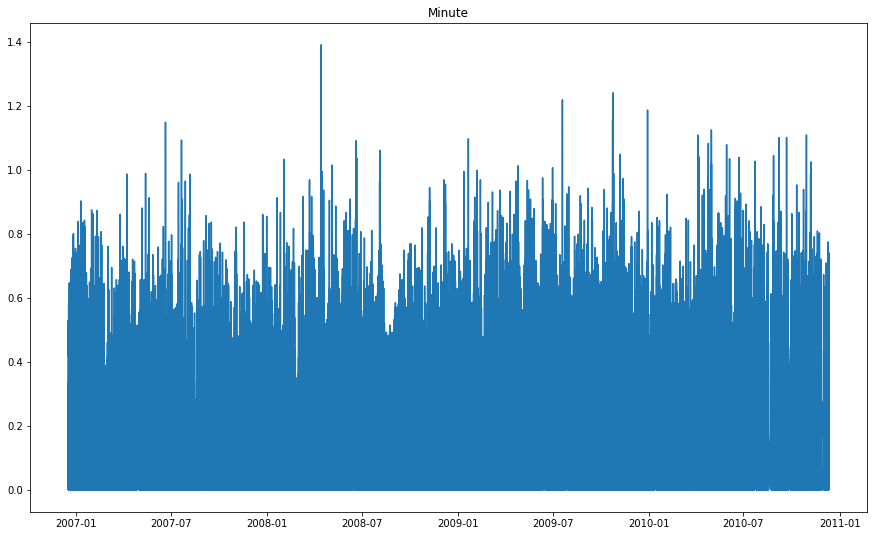

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,,
2006-12-16 17:00:00,152.024,8.244,8447.18,651.6,0.0,19.0,607.0,1907.733333
2006-12-16 18:00:00,217.932,4.802,14074.81,936.0,0.0,403.0,1012.0,2217.200000
2006-12-16 19:00:00,204.014,5.114,13993.95,870.2,0.0,86.0,1001.0,2313.233333
2006-12-16 20:00:00,196.114,4.506,14044.29,835.0,0.0,0.0,1007.0,2261.566667
2006-12-16 21:00:00,183.388,4.600,14229.52,782.8,0.0,25.0,1033.0,1998.466667
...,...,...,...,...,...,...,...,...
2010-12-11 19:00:00,143.518,6.828,13931.03,620.2,21.0,0.0,788.0,1582.966667
2010-12-11 20:00:00,105.200,5.090,14040.45,450.0,483.0,66.0,604.0,600.333333
2010-12-11 21:00:00,66.894,5.148,14192.62,284.8,513.0,27.0,0.0,574.900000


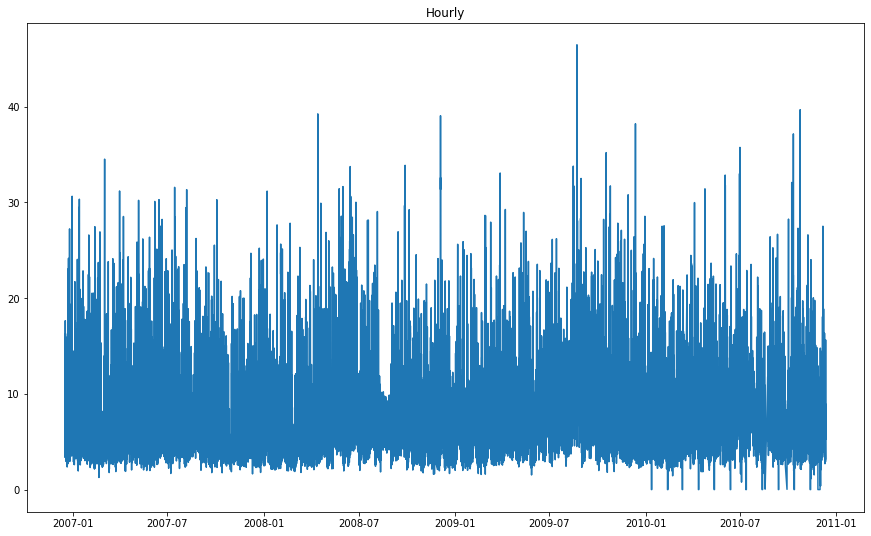

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0,14680.933333
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0,36946.666667
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0,19028.433333
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0,13131.900000
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0,20384.800000
...,...,...,...,...,...,...,...,...
2010-12-07,1109.574,285.912,345914.85,4892.0,1724.0,646.0,6444.0,9678.900000
2010-12-08,529.698,169.098,346744.70,2338.2,0.0,514.0,3982.0,4332.300000
2010-12-09,1612.092,201.358,347932.40,6848.2,1805.0,2080.0,8891.0,14092.200000


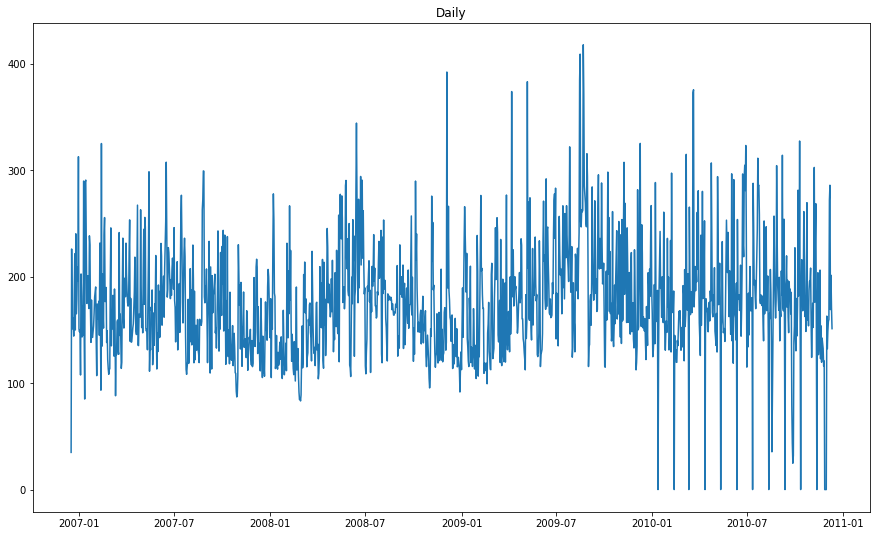

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,,
2006-12-17,4599.636,260.928,439277.85,19579.4,2033.0,4733.0,18267.0,51627.600000
2006-12-24,17477.618,1176.174,2433008.21,73994.4,11190.0,21351.0,77447.0,181305.633333
2006-12-31,19749.552,1453.126,2438445.48,83078.0,14312.0,22675.0,67272.0,224900.200000
2007-01-07,11613.172,1106.011,2407587.59,49243.3,10773.0,8669.0,61414.0,112696.866667
2007-01-14,14335.582,1473.392,2408937.93,61157.2,24526.0,15027.0,69854.0,129519.366667
...,...,...,...,...,...,...,...,...
2010-11-14,9463.060,1198.286,2072852.73,40336.6,11756.0,10329.0,50718.0,84914.666667
2010-11-21,11159.630,1004.746,2426473.63,47125.8,8770.0,9616.0,63356.0,104251.833333
2010-11-28,8334.588,649.218,1689256.98,35214.8,9978.0,6227.0,45032.0,77672.800000


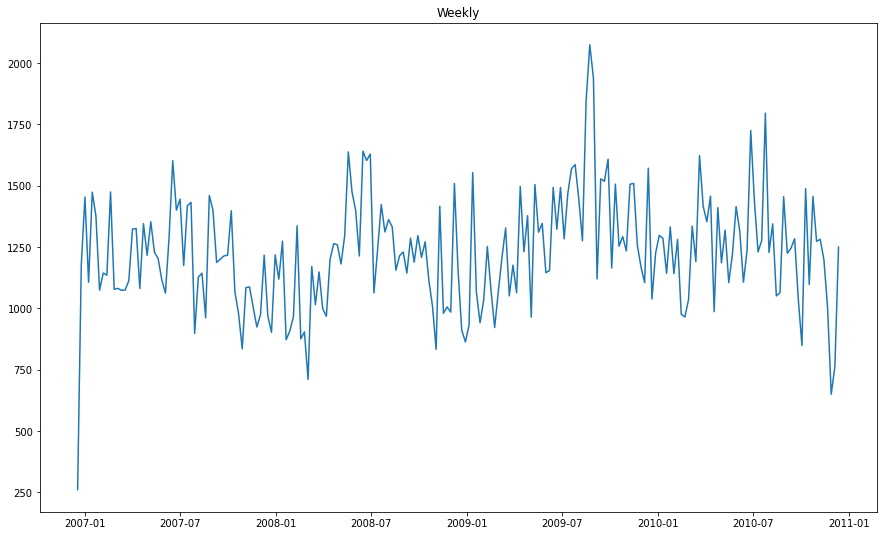

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,,
2006-12-31,41826.806,2890.228,5.310732e+06,176651.8,27535.0,48759.0,162986.0,457833.433333
2007-01-31,63825.435,5562.837,1.072011e+07,270677.9,72455.0,66382.5,323313.0,601606.750000
2007-02-28,46570.970,4632.394,9.671603e+06,197412.2,35733.0,65544.0,232917.0,441988.833333
2007-03-31,55278.093,5127.460,1.071130e+07,234478.3,58307.0,87919.0,280266.0,494809.550000
2007-04-30,39989.134,5320.925,1.029775e+07,172215.4,45958.0,53811.0,194004.0,372712.566667
...,...,...,...,...,...,...,...,...
2010-08-31,39072.400,5421.330,1.042761e+07,166102.2,26010.0,44521.0,244560.0,336115.666667
2010-09-30,42937.550,4789.686,1.006168e+07,181499.6,34687.0,37156.0,302458.5,341324.333333
2010-10-31,48721.756,5812.479,1.047666e+07,204474.3,38450.0,58825.0,311571.0,403183.266667


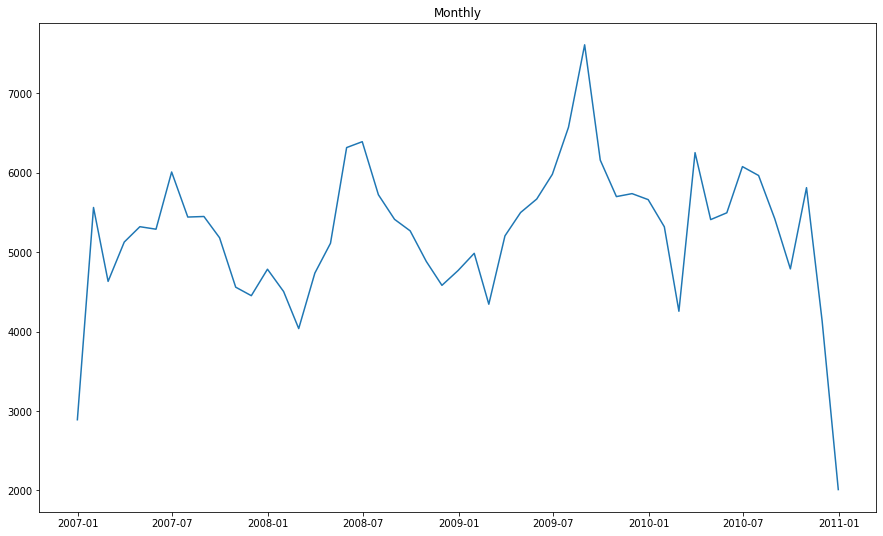

In [6]:
filename = os.path.join(dirname,output_basename)
dataset_df.to_csv(filename, compression="gzip")

periods = {
    "Minute":"T",
    "Hourly":"H",
    "Daily":"D",
    "Weekly":"W",
    "Monthly":"M"
}
    
for key,value in periods.items():
    tmp_df = dataset_df.resample(value).sum()
    filename = os.path.join(dirname,"{}-{}".format(key.lower(), output_basename))
    tmp_df.to_csv(filename, compression="gzip")
    
    with pd.option_context("display.max_rows", 10, "display.max_columns", None):
        display(tmp_df)
    fig,ax = plt.subplots(figsize=(15,9))
    ax.plot(tmp_df["Global_reactive_power"])
    ax.set_title(key)
    plt.show()